## Objective 1

In this notebook we tackle the first objective outlined in this project, compare the platforms Xbox 360 and Wii by evaluation of regional sales. This will be completed using data visualisation, the figures created can then be produced as part of any necessary reporting. To begin the preprocessed data is split into two distinct dataframes, one containing all games released on Xbox 360 and the other containing all games released on Wii.

In [42]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Read the data
data = pd.read_csv("../data/processed/vgsales_processed.csv")

In [6]:
# Create dataframes for Xbox 360 and Wii
Xbox360 = data[data['Platform'] == 'X360'].reset_index()
Xbox360 = Xbox360.drop(labels='index', axis=1)
Wii = data[data['Platform'] == 'Wii'].reset_index()
Wii = Wii.drop(labels='index', axis=1)

# Look at the number of observations of the new dataframes
print(Xbox360.shape, Wii.shape)

(1265, 11) (1325, 11)


It can be seen above that the sample sizes for these platforms are similar which means that conducting such an analysis is acceptable. The below pie charts show the percentage of how many games were sold in each year on each platform.

In [38]:
# Extract the percentage of the total number of games sold in each year for Xbox 360
Xbox_by_year = np.array(Xbox360.groupby("Year")["Name"].count())
Xbox_labels = np.sort(Xbox360["Year"].unique())
totalx = Xbox_by_year.sum()
percx = [(100*(Xbox_by_year[i]/totalx)).round(2) for i in range(len(Xbox_by_year))]
xcent = list(map("{}%".format, percx))

# Extract the percentage of the total number of games sold in each year for Wii
Wii_by_year = np.array(Wii.groupby("Year")["Name"].count())
Wii_labels = np.sort(Wii["Year"].unique())
totalw = Wii_by_year.sum()
percw = [(100*(Wii_by_year[i]/totalw)).round(2) for i in range(len(Wii_by_year))]
wcent = list(map("{}%".format, percw))

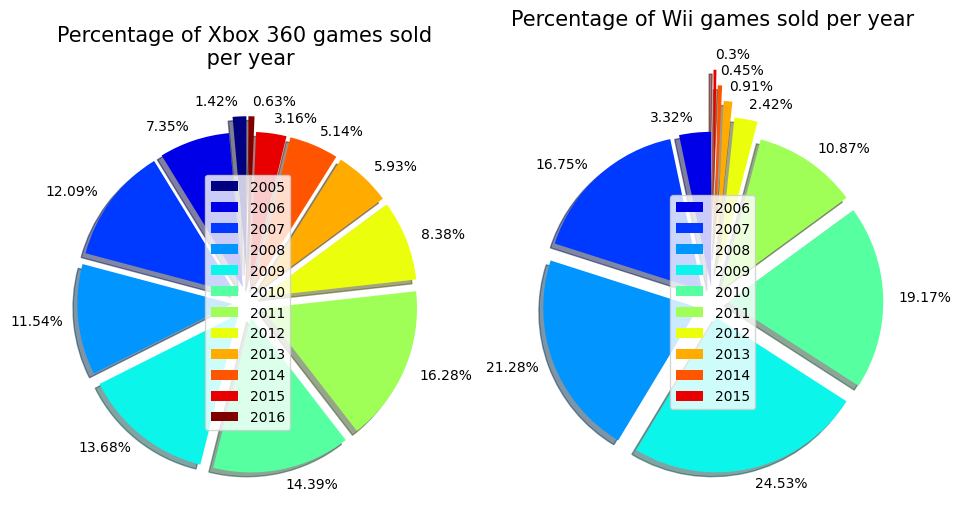

In [56]:
## Creating pie charts
fig, ax = plt.subplots(1,2, figsize=(11,7))
colours = plt.cm.jet(np.linspace(0, 1, 12))

# Pie chart for Xbox 360
explodex = (0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2)
ax[0].pie(Xbox_by_year, explode=explodex, labels = xcent, shadow=True, startangle=90, colors=colours)
ax[0].legend(Xbox_labels, loc=10)
ax[0].set_title("Percentage of Xbox 360 games sold \n per year", fontsize=15, pad=32)

# Pie chart for Wii
explodew = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.3, 0.4, 0.5)
ax[1].pie(Wii_by_year, explode=explodew, labels = wcent, shadow=True, startangle=90, colors=colours[1:])
ax[1].legend(Wii_labels, loc=10)
ax[1].set_title("Percentage of Wii games sold per year", fontsize=15, pad=60)

plt.savefig("../reports/figures/Percentage Pie Charts.png")
plt.show()

The above shows that no games for the years 2005 and 2016 had more than 100,000 sales for the Wii platform. The fact that the Wii was released in 2006 explains why there are no games for 2005. However, for the year 2016, the reason behind why no games had this number of sales remains a mystery. 

We now extract the information we need to compare the sales for the two platforms across different regions. We begin by considering the sales in North America. 

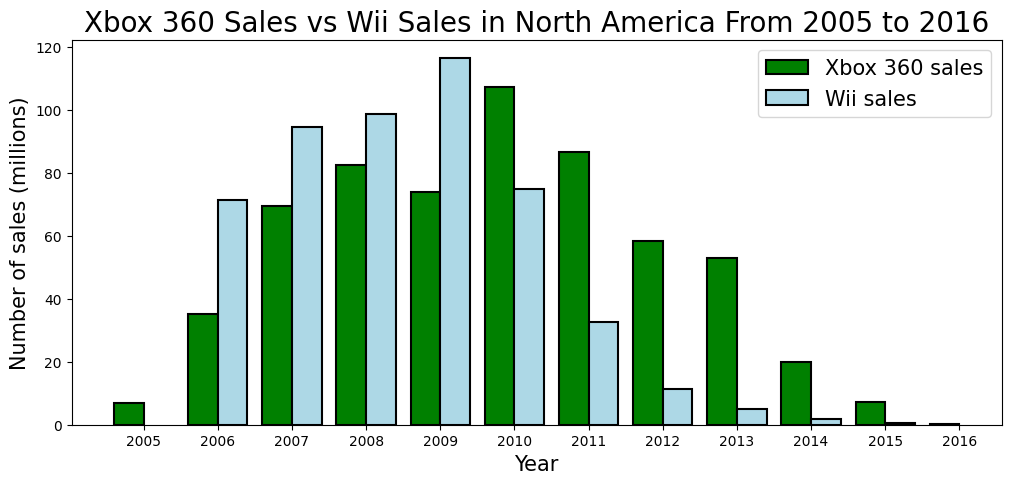

In [55]:
# List of yearly sales in North America for the Xbox 360
NA_values_Xbox = [Xbox360[Xbox360["Year"] == year]["NA_Sales"].sum() for year in Xbox_labels]

# List of yearly sales in North America for the Wii
NA_values_Wii = [Wii[Wii["Year"] == year]["NA_Sales"].sum() for year in Wii_labels]

# Plot a bar chart for the sales in North America
fig, ax = plt.subplots(figsize=(12,5))

barwidth = 0.4
ax.bar(Xbox_labels-0.2, NA_values_Xbox, width=barwidth, label="Xbox 360 sales", 
       edgecolor = "black", linewidth=1.5, color="g")
ax.bar(Wii_labels+0.2, NA_values_Wii, width=barwidth, label="Wii sales",
       edgecolor = "black", linewidth=1.5, color="lightblue")
ax.legend(fontsize=15)
ax.set_title("Xbox 360 Sales vs Wii Sales in North America From 2005 to 2016", 
             fontsize=20)
plt.xticks(Xbox_labels)
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Number of sales (millions)", fontsize=15)

plt.savefig("../reports/figures/Sales in North America.png")
plt.show()